乳腺癌数据集具有的特征：
* Age(年龄)<br>
* Race(种族）<br>
* Marital_Status(婚姻状态)<br>
* T_Stage(原发肿瘤的大小)<br>
* N_Stage(癌细胞扩散的淋巴结情况)<br>
* Sixth_Stage<br>
* Grade<br>
* A_Stage<br>
* Tumor_Size(肿瘤大小)<br>
* Estrogen_Status(雌激素受体是否阳性)<br>
* Progesterone_Status(孕激素受体是否阳性)<br>
* Regional_Node_Examined<br>
* Reginol_Node_Positive<br>
* Survival_Months（生存时间，单位:月)<br>
<br>
<br>
这个乳腺癌数据集研究的失效事件是"Status"中的"Dead",生存时间是"Survival_Months"单位是月

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path="/Users/linjiaxi/Desktop/Graduation Thesis/数据集/SEER Breast Cancer Dataset.csv"

# 读取CSV文件
df = pd.read_csv(file_path)

In [4]:
df.head(10)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),NaN,T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),NaN,T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead
5,49,White,Married (including common law),NaN,T2,N3,IIIC,Moderately differentiated; Grade II,Regional,32,Positive,Positive,20,11,3,Alive
6,64,White,Single (never married),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,22,Positive,Positive,1,1,3,Dead
7,55,White,Married (including common law),NaN,T1,N1,IIA,Moderately differentiated; Grade II,Regional,15,Positive,Positive,9,1,3,Alive
8,59,White,Single (never married),NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,70,Positive,Positive,9,1,4,Dead
9,67,White,Married (including common law),NaN,T3,N2,IIIA,Poorly differentiated; Grade III,Regional,55,Positive,Positive,9,9,4,Dead


In [5]:
df.columns

Index(['Age', 'Race ', 'Marital Status', 'Unnamed: 3', 'T Stage ', 'N Stage',
       '6th Stage', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [6]:
new_column_names = {
    'Age': 'Age',
    'Race ': 'Race',
    'Marital Status': 'Marital_Status',
    'Unnamed: 3': 'Unnamed:3',
    'T Stage ': 'T_Stage',
    'N Stage': 'N_Stage',
    '6th Stage': 'Sixth_Stage',
    'Grade': 'Grade',
    'A Stage': 'A_Stage',
    'Tumor Size': 'Tumor_Size',
    'Estrogen Status': 'Estrogen_Status',
    'Progesterone Status': 'Progesterone_Status',
    'Regional Node Examined': 'Regional_Node_Examined',
    'Reginol Node Positive': 'Regional_Node_Positive',
    'Survival Months': 'Survival_Month',
    'Status': 'Status'
}

# 使用rename()方法修改列名
df = df.rename(columns=new_column_names)

# 删除名为'Unnamed:3'的列
df = df.drop(columns=['Unnamed:3'])

In [7]:
df.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status
0,43,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N3,IIIC,Moderately differentiated; Grade II,Regional,40,Positive,Positive,19,11,1,Alive
1,47,"Other (American Indian/AK Native, Asian/Pacifi...",Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,45,Positive,Positive,25,9,2,Alive
2,67,White,Married (including common law),T2,N1,IIB,Poorly differentiated; Grade III,Regional,25,Positive,Positive,4,1,2,Dead
3,46,White,Divorced,T1,N1,IIA,Moderately differentiated; Grade II,Regional,19,Positive,Positive,26,1,2,Dead
4,63,White,Married (including common law),T2,N2,IIIA,Moderately differentiated; Grade II,Regional,35,Positive,Positive,21,5,3,Dead


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital_Status          4024 non-null   object
 3   T_Stage                 4024 non-null   object
 4   N_Stage                 4024 non-null   object
 5   Sixth_Stage             4024 non-null   object
 6   Grade                   4024 non-null   object
 7   A_Stage                 4024 non-null   object
 8   Tumor_Size              4024 non-null   int64 
 9   Estrogen_Status         4024 non-null   object
 10  Progesterone_Status     4024 non-null   object
 11  Regional_Node_Examined  4024 non-null   int64 
 12  Regional_Node_Positive  4024 non-null   int64 
 13  Survival_Month          4024 non-null   int64 
 14  Status                  4024 non-null   object
dtypes: i

## 数据预处理

In [9]:
for name in df.columns.values:
    if df[name].dtype==object:
        print(f'Column name:{name}')
        print(f'value:{df[name].unique().tolist()}\n')

Column name:Race
value:['Other (American Indian/AK Native, Asian/Pacific Islander)', 'White', 'Black']

Column name:Marital_Status
value:['Married (including common law)', 'Divorced', 'Single (never married)', 'Widowed', 'Separated']

Column name:T_Stage
value:['T2', 'T1', 'T3', 'T4']

Column name:N_Stage
value:['N3', 'N2', 'N1']

Column name:Sixth_Stage
value:['IIIC', 'IIIA', 'IIB', 'IIA', 'IIIB']

Column name:Grade
value:['Moderately differentiated; Grade II', 'Poorly differentiated; Grade III', 'Well differentiated; Grade I', 'Undifferentiated; anaplastic; Grade IV']

Column name:A_Stage
value:['Regional', 'Distant']

Column name:Estrogen_Status
value:['Positive', 'Negative']

Column name:Progesterone_Status
value:['Positive', 'Negative']

Column name:Status
value:['Alive', 'Dead']



In [10]:
# 1. 对Race进行预处理
# Race：Other (American Indian/AK Native, Asian/Pacific Islander), White, Black
# 将Race编码为数字
df['Race']=pd.factorize(df['Race'])[0].astype(np.uint16)
df['Race']

0       0
1       0
2       1
3       1
4       1
       ..
4019    1
4020    1
4021    1
4022    0
4023    1
Name: Race, Length: 4024, dtype: uint16

In [11]:
# 2. 对Marital Status进行预处理
df['Marital_Status']=pd.factorize(df['Marital_Status'])[0].astype(np.uint16)
df['Marital_Status']

0       0
1       0
2       0
3       1
4       0
       ..
4019    0
4020    0
4021    1
4022    0
4023    1
Name: Marital_Status, Length: 4024, dtype: uint16

In [12]:
# 3. 对A_Stage进行预处理
df['A_Stage']=pd.factorize(df['A_Stage'])[0].astype(np.uint16)
df['A_Stage']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: A_Stage, Length: 4024, dtype: uint16

In [13]:
# 4. 对T_Stage进行预处理
df['T_Stage']=df['T_Stage'].map({'T1':1,'T2':2,'T3':3,'T4':4})
df['T_Stage']

0       2
1       2
2       2
3       1
4       2
       ..
4019    1
4020    1
4021    1
4022    1
4023    1
Name: T_Stage, Length: 4024, dtype: int64

In [14]:
# 5. 对Sixth_Stage进行预处理
df['Sixth_Stage']=df['Sixth_Stage'].map({'IIA':0,'IIB':1,'IIIA':2,'IIIB':3,'IIIC':4})
df['Sixth_Stage']

0       4
1       2
2       1
3       0
4       2
       ..
4019    0
4020    2
4021    0
4022    0
4023    0
Name: Sixth_Stage, Length: 4024, dtype: int64

In [15]:
# 6. 对Grade进行预处理
df['Grade']=df['Grade'].map({'Well differentiated; Grade I':0,
                            'Moderately differentiated; Grade II':1,
                            'Poorly differentiated; Grade III':2,
                            'Undifferentiated; anaplastic; Grade IV':3})
df['Grade']

0       1
1       1
2       2
3       1
4       1
       ..
4019    0
4020    2
4021    1
4022    1
4023    1
Name: Grade, Length: 4024, dtype: int64

In [16]:
# 7. 对Estrogen_Status进行预处理
df['Estrogen_Status']=df['Estrogen_Status'].map({'Positive':0,'Negative':1})
df['Estrogen_Status']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    1
4021    1
4022    0
4023    0
Name: Estrogen_Status, Length: 4024, dtype: int64

In [17]:
# 8. 对Progesterone_Status进行预处理
df['Progesterone_Status']=df['Progesterone_Status'].map({'Positive':0,'Negative':1})
df['Progesterone_Status']

0       0
1       0
2       0
3       0
4       0
       ..
4019    0
4020    1
4021    1
4022    0
4023    0
Name: Progesterone_Status, Length: 4024, dtype: int64

In [18]:
# 9. 对Status进行预处理
df['Status']=df['Status'].map({'Alive':0,'Dead':1})
df['Status']

0       0
1       0
2       1
3       1
4       1
       ..
4019    0
4020    0
4021    0
4022    0
4023    0
Name: Status, Length: 4024, dtype: int64

In [19]:
# 10. 对N_Stage进行预处理
df['N_Stage']=df['N_Stage'].map({'N1':0,'N2':1,'N3':2})
df['N_Stage']

0       2
1       1
2       0
3       0
4       1
       ..
4019    0
4020    1
4021    0
4022    0
4023    0
Name: N_Stage, Length: 4024, dtype: int64

In [20]:
df.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status
0,43,0,0,2,2,4,1,0,40,0,0,19,11,1,0
1,47,0,0,2,1,2,1,0,45,0,0,25,9,2,0
2,67,1,0,2,0,1,2,0,25,0,0,4,1,2,1
3,46,1,1,1,0,0,1,0,19,0,0,26,1,2,1
4,63,1,0,2,1,2,1,0,35,0,0,21,5,3,1


## 数据分析

In [21]:
print(len(df))

4024


In [22]:
print(df['Status'].value_counts())

Status
0    3408
1     616
Name: count, dtype: int64


### 1. 不同原发肿瘤分期人数的柱状分布图

<AxesSubplot:xlabel='T_Stage', ylabel='count'>

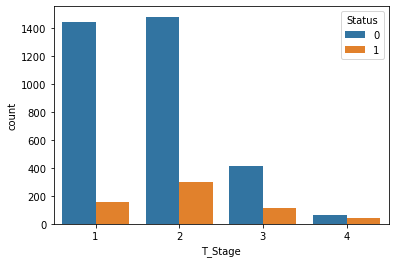

In [23]:
sns.countplot(x='T_Stage',hue='Status',data=df)

### 2. 不同淋巴结转移情况人数的柱状分布图（删失人数和死亡人数）

<AxesSubplot:xlabel='N_Stage', ylabel='count'>

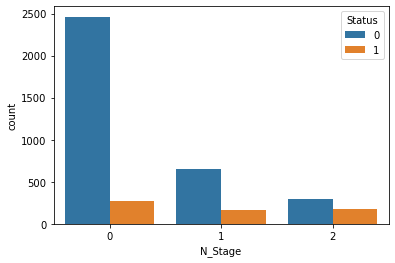

In [24]:
sns.countplot(x='N_Stage',hue='Status',data=df)

### 3. 不同年龄人数的箱线图

[Text(1, 0, 'censor'), Text(2, 0, 'death')]

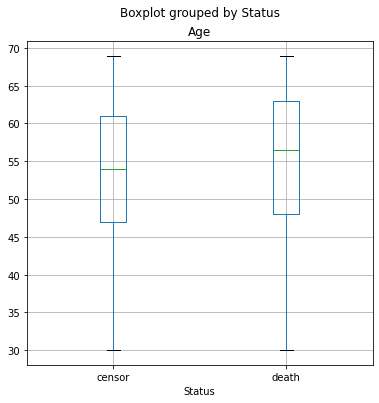

In [25]:
ax=df.boxplot(column='Age',by='Status',figsize=(6,6))
ax.set_xticklabels(['censor','death'])
#death组的年龄中位数为censor组高一点

### 4. 绘制生命周期图

In [26]:
#从数据集中随机挑选30例患者，绘制生命周期图
from lifelines.plotting import plot_lifetimes
df_sample=df.sample(n=30,random_state=10)

/Users/linjiaxi/Anaconda/anaconda3/lib/python3.9/site-packages/lifelines/plotting.py:773: UserWarning: For less visual clutter, you may want to subsample to less than 25 individuals.
  warnings.warn(


Text(0.5, 0, 'Months')

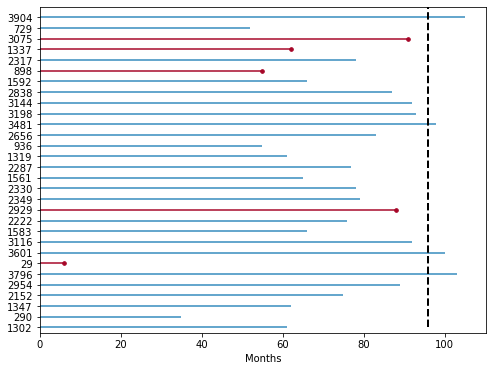

In [27]:
df_sample['Status']=np.where(df_sample['Status']==1,True,False)
plt.figure(figsize=[8,6])
ax=plot_lifetimes(df_sample['Survival_Month'],event_observed=df_sample['Status'],sort_by_duration=False)
ax.vlines(96,0,30,lw=2,linestyles='--',colors='black')
plt.xlabel('Months')

观测时间的定位为96个月，在96个月中，有5位患者发生死亡时间，其余患者大多数还没到96个月就失去了联系/无法随访到患者（属于删失数据）<br>
Eg: 图片中1347号患者，在随访到第62个月，患者就失去了联系，并不知道患者的实际存活时间<br>
结论：无论不结合删失数据，单独计算发生失效事件的患者的平均存活时间，还是结合删失数据一起计算患者的平均存活时间，这样计算都是要低估了真实的存活时间

## 生存分析

### 1. 绘制寿命表，计算生存率并绘制生存曲线

In [28]:
from lifelines.utils import survival_table_from_events

def months_to_year(x):
    if x%12==0:
        return x/12
    else:
        return int(x/12)+1
df['year']=df['Survival_Month'].map(months_to_year)
T=df['year']
E=df['Status']
survival_table_from_events(T,E,columns=['removed','observed','censored','entrance','at_risk'])

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.0,0,0,0,4024,4024
1.0,71,47,24,0,4024
2.0,114,88,26,0,3953
3.0,117,100,17,0,3839
4.0,225,118,107,0,3722
5.0,739,105,634,0,3497
6.0,725,60,665,0,2758
7.0,731,54,677,0,2033
8.0,674,33,641,0,1302


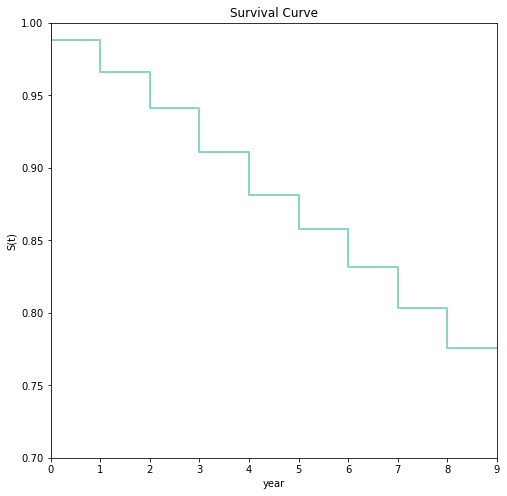

In [29]:
#通过计算出的生存率绘制生存曲线
x=[0,1,2,3,4,5,6,7,8,9]
y=[1,0.9883,0.9663,0.941,0.911,0.881,0.858,0.8313,0.803,0.776]
plt.figure(figsize=(8,8))
plt.title('Survival Curve')
plt.step(x,y,color='#8dd3c7',where='pre',lw=2)
plt.xlim(0,9)
plt.ylim(0.7,1)
plt.xlabel("year")
plt.ylabel("S(t)")
plt.show()

### 2. Kaplan-Meier法

生存率S(t)，当t=3时，意思研究对象活过3年时的生存率，是对象活过2年时的前提下计算活过3年的生存率，而知道活过2年的生存率，是研究对象活过1年的前提下计算出来。<br>
S(t=3) = P1 * P2 * P3 ,P是每一年的生存概率

#### （1）绘制生存曲线

生成概率：
          KM_estimate
timeline             
0.0          1.000000
1.0          1.000000
2.0          0.999503
3.0          0.999006
4.0          0.996767
...               ...
103.0        0.785709
104.0        0.785709
105.0        0.785709
106.0        0.785709
107.0        0.785709

[108 rows x 1 columns]
中间存活概率=0.5时的，95%区间
     KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.5                     inf                     inf


<AxesSubplot:xlabel='timeline'>

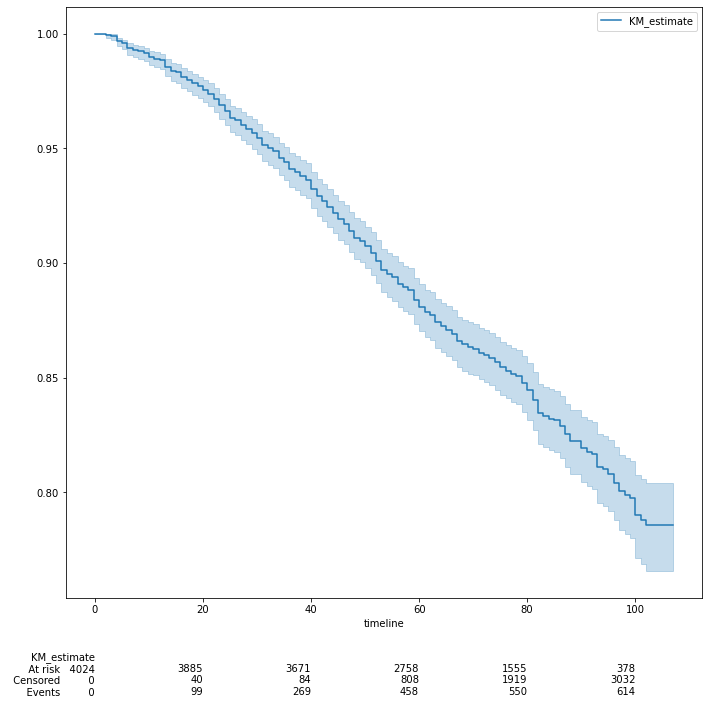

In [30]:
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times

#使用 KaplanMeierFitter() 创建了一个KaplanMeierFitter对象 kmf
kmf = KaplanMeierFitter()

#拟合生存数据：传入生存时间和事件发生指示作为参数，对乳腺癌数据进行拟合
kmf.fit(durations=df['Survival_Month'],
       event_observed=df['Status']) 
print("生成概率：")
print(kmf.survival_function_)
print("中间存活概率=0.5时的，95%区间") 

#计算中位生存时间：计算了中位生存时间的95%置信区间
median_confidence_interval = median_survival_times(kmf.confidence_interval_)
print(median_confidence_interval)  #因为在研究期间生存概率没有低于0.5，所以没有中间生存概率对应的时间
plt.figure(figsize=[10,10])

#绘制生存曲线：使用 kmf.plot_survival_function() 方法绘制了生存曲线，并设置了参数 at_risk_counts=True，以显示每个时间点的风险计数。
kmf.plot_survival_function(at_risk_counts=True)#show_censors =True  是否显示删失 ，at_risk_counts=True 是否显示风险计数

结论：<br>
1. 生成概率<br>
给定不同的时间点（timeline），生存函数估计值（KM_estimate）表示在该时间点之前仍然存活的概率。<br>
例如，当时间为0时，生存概率为1.0，表示所有患者在入组时均存活；随着时间的推移，患者的生存概率逐渐下降，直到某个时间点患者的生存概率为0.785709，表示在该时间点后，大约有78.57%的患者存活。<br>
即：随着时间的推移，患者的生存概率在逐渐下降。<br>
2. 中间存活概率=0.5时，95%区间：<br>
由于生存概率没有低于0.5，因此在研究期间没有中间生存概率对应的时间，因此区间的下限和上限都是正无穷（inf）
即：在研究期间没有观察到生存概率低于0.5的情况<br>

In [31]:
#打印生存曲线的简短统计内容(寿命表)。包括观察值，事件数，删失数，生存率和其置信区间。
pd.concat([kmf.event_table,kmf.survival_function_,kmf.confidence_interval_],axis=1)

,removed,observed,censored,entrance,at_risk,KM_estimate,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,0,0,0,4024,4024,1.000000,1.000000,1.000000
1.0,1,0,1,0,4024,1.000000,1.000000,1.000000
2.0,3,2,1,0,4023,0.999503,0.998014,0.999876
3.0,4,2,2,0,4020,0.999006,0.997353,0.999627
4.0,10,9,1,0,4016,0.996767,0.994438,0.998121
...,...,...,...,...,...,...,...,...
103.0,50,0,50,0,251,0.785709,0.765872,0.804086
104.0,48,0,48,0,201,0.785709,0.765872,0.804086
105.0,45,0,45,0,153,0.785709,0.765872,0.804086
106.0,47,0,47,0,108,0.785709,0.765872,0.804086


#### （2）对数据进行分组后，进行单因素方差分析

#### (2.1) 对T_Stage组别进行分组，观察不同肿瘤大小时期的生存情况

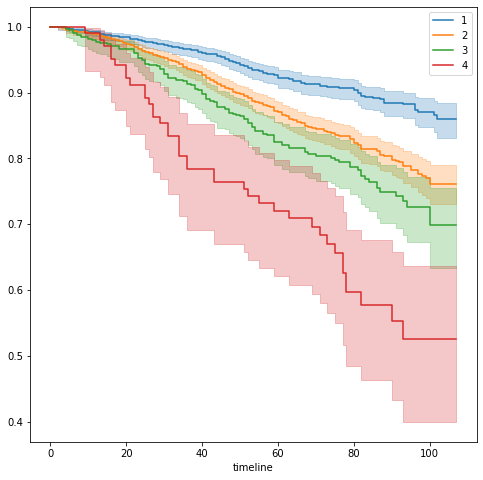

In [32]:
#分析：设置对照组与实验组，比较两组之间的生存差异，
#Method1: 通过中位生存时间进行比较
#Method2: 指定时间点来计算P值两组曲线是否有显著性差异
#Method3: 计算T时间内生存曲线下的面积
#Method4: 计算第p百分位生存时间来比较两组之间的生存差异

from lifelines import KaplanMeierFitter
plt.figure(figsize=(8,8))
kmf = KaplanMeierFitter()
#对每个T_Stage组别进行生存分析：
#对于每个 T_Stage 组别，调用 kmf.fit() 方法，传入该组别的生存时间和事件发生指示作为参数，对该组别的数据进行 Kaplan-Meier 生存分析
for name, grouped_df in df.groupby('T_Stage'):
    kmf.fit(grouped_df["Survival_Month"], grouped_df["Status"], label=name)
    #绘制生存曲线
    kmf.plot_survival_function()


#### (2.2) 对Age组别进行分组，观察不同年龄段的生存情况

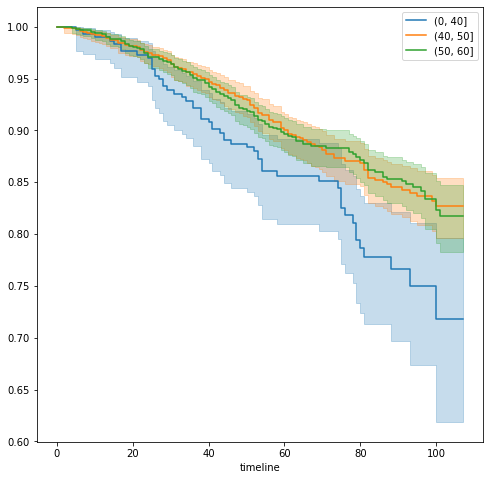

In [39]:
from lifelines import KaplanMeierFitter
df['age_'] = pd.cut(df['Age'],[0,40,50,60])
plt.figure(figsize=(8,8))
kmf = KaplanMeierFitter()

#循环遍历不同的年龄段组别：使用 df.groupby('age_') 对 DataFrame 中的数据按照年龄段进行分组，并依次遍历每个分组
for name, grouped_df in df.groupby('age_'):
    #对每个年龄段组别进行生存分析：对于每个年龄段组别，调用 kmf.fit() 方法，传入该组别的生存时间和事件发生指示作为参数，对该组别的数据进行 Kaplan-Meier 生存分析。
    kmf.fit(grouped_df["Survival_Month"], grouped_df["Status"], label=name)
    #绘制生存曲线
    kmf.plot_survival_function()

#### (2.3) 计算不同T_Stage组别的患者的中位生存时间

In [33]:
from lifelines.utils import median_survival_times
kmf = KaplanMeierFitter()

#循环遍历不同的 T_Stage 组别：使用 df.groupby('T_Stage') 对 df 中的数据按照 T_Stage 进行分组，并依次遍历每个分组
for name, grouped_df in df.groupby('T_Stage'):
    kmf_temp = KaplanMeierFitter().fit(grouped_df["Survival_Month"], grouped_df["Status"])
    #计算中位生存时间：使用 median_survival_times() 函数，传入 kmf_temp 对象作为参数，计算该组别的中位生存时间
    median = median_survival_times(kmf_temp)
    print(f"{name}组的中位生存时间:{median}")

1组的中位生存时间:inf
2组的中位生存时间:inf
3组的中位生存时间:inf
4组的中位生存时间:inf


结论：因为这个数据有些组的生存率最后都是大于0.5，因此无法计算中位生存时间，因此显示inf

#### (2.4) 根据第qth分位数的生存时间，来求对应的生存时间

In [34]:
from lifelines.utils import qth_survival_time
qth = 0.9 #生存时间的90%分位数
kmf = KaplanMeierFitter()

#循环遍历不同的 T_Stage 组别：使用 df.groupby('T_Stage') 对 df 中的数据按照 T_Stage 进行分组，并依次遍历每个分组
for name, grouped_df in df.groupby('T_Stage'):
    kmf_temp = KaplanMeierFitter().fit(grouped_df["Survival_Month"], grouped_df["Status"])
    #计算生存时间的第 90 百分位数：使用 qth_survival_time() 函数，传入 qth 和 kmf_temp 对象作为参数，计算该组别的生存时间的第 90 百分位数
    time = qth_survival_time(qth,kmf_temp)
    print(f"{name}组的第{qth*100}分位数的生存时间:{time}")


1组的第90.0分位数的生存时间:81.0
2组的第90.0分位数的生存时间:49.0
3组的第90.0分位数的生存时间:40.0
4组的第90.0分位数的生存时间:25.0


/Users/linjiaxi/Anaconda/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/Users/linjiaxi/Anaconda/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/Users/linjiaxi/Anaconda/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: ApproximationWarning: Approximating using `survival_function_`. To increase accuracy, try using or increasing the resolution of the timeline kwarg in `.fit(..., timeline=timeline)`.

  warnings.warn(
/Users/linjiaxi/Anaconda/anaconda3/lib/python3.9/site-packages/lifelines/fitters/__init__.py:279: Approxim

#### (2.5) 在特定时间进行生存差异检验

In [35]:
from lifelines.statistics import survival_difference_at_fixed_point_in_time_test
from lifelines.datasets import load_waltons
from lifelines.utils import restricted_mean_survival_time
from lifelines.plotting import rmst_plot

T = df['Survival_Month'] #提取数据中的生存时间
E = df['Status'] #提取数据中的事件发生指示
ix = df['A_Stage']== 0 #设置比较组

time_limit=60 #指定T时间内

kmf_1 = KaplanMeierFitter().fit(T[ix],  E[ix])
rmst_1 = restricted_mean_survival_time(kmf_1, t=time_limit)
print(f"曲线下面积:{rmst_1}")

kmf_2 = KaplanMeierFitter().fit(T[~ix],  E[~ix])
rmst_2 = restricted_mean_survival_time(kmf_2, t=time_limit)
print(f"曲线下面积:{rmst_2}")

point_in_time = 60. #指定进行生存差异检验比较的时间
#进行生存差异检验：调用 survival_difference_at_fixed_point_in_time_test 函数，传入指定的时间点和两个组别的生存曲线，进行生存差异检验。
results = survival_difference_at_fixed_point_in_time_test(point_in_time, kmf_1, kmf_2)
results.print_summary()


曲线下面积:57.22662022019027
曲线下面积:49.82516339891577


<lifelines.StatisticalResult: survival_difference_at_fixed_point_in_time_test>
 null_distribution = chi squared
degrees_of_freedom = 1
     point_in_time = 60.0
           fitterA = <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3932 total observations, 3351 right-censored observations>
           fitterB = <lifelines.KaplanMeierFitter:"KM_estimate", fitted with 92 total observations, 57 right-censored observations>
         test_name = survival_difference_at_fixed_point_in_time_test

---
 test_statistic      p  -log2(p)
          40.84 <0.005     32.49

<AxesSubplot:xlabel='timeline'>

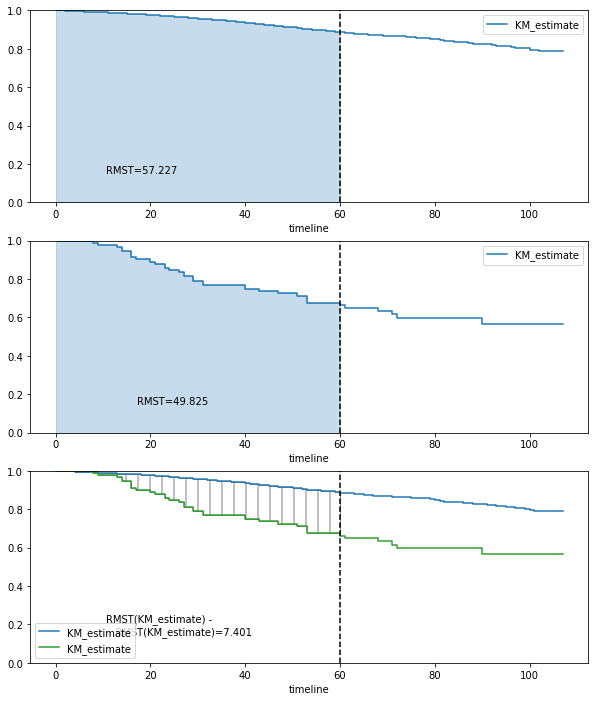

In [36]:
#把曲线面积绘制出来
plt.figure(figsize=(10,12))
ax = plt.subplot(311)
rmst_plot(kmf_1, t=time_limit, ax=ax)
ax = plt.subplot(312)
rmst_plot(kmf_2, t=time_limit, ax=ax)
ax = plt.subplot(313)
rmst_plot(kmf_1, model2=kmf_2, t=time_limit, ax=ax)

### 2. 统计模型部分

#### (2.1）数据预处理

In [37]:
df.head(10)

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status,year,age_
0,43,0,0,2,2,4,1,0,40,0,0,19,11,1,0,1.0,"(40.0, 50.0]"
1,47,0,0,2,1,2,1,0,45,0,0,25,9,2,0,1.0,"(40.0, 50.0]"
2,67,1,0,2,0,1,2,0,25,0,0,4,1,2,1,1.0,NaN
3,46,1,1,1,0,0,1,0,19,0,0,26,1,2,1,1.0,"(40.0, 50.0]"
4,63,1,0,2,1,2,1,0,35,0,0,21,5,3,1,1.0,NaN
5,49,1,0,2,2,4,1,0,32,0,0,20,11,3,0,1.0,"(40.0, 50.0]"
6,64,1,2,2,0,1,1,0,22,0,0,1,1,3,1,1.0,NaN
7,55,1,0,1,0,0,1,0,15,0,0,9,1,3,0,1.0,"(50.0, 60.0]"
8,59,1,2,3,0,2,1,0,70,0,0,9,1,4,1,1.0,"(50.0, 60.0]"
9,67,1,0,3,1,2,2,0,55,0,0,9,9,4,1,1.0,NaN


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     4024 non-null   int64   
 1   Race                    4024 non-null   uint16  
 2   Marital_Status          4024 non-null   uint16  
 3   T_Stage                 4024 non-null   int64   
 4   N_Stage                 4024 non-null   int64   
 5   Sixth_Stage             4024 non-null   int64   
 6   Grade                   4024 non-null   int64   
 7   A_Stage                 4024 non-null   uint16  
 8   Tumor_Size              4024 non-null   int64   
 9   Estrogen_Status         4024 non-null   int64   
 10  Progesterone_Status     4024 non-null   int64   
 11  Regional_Node_Examined  4024 non-null   int64   
 12  Regional_Node_Positive  4024 non-null   int64   
 13  Survival_Month          4024 non-null   int64   
 14  Status                  

In [39]:
df['Race']=df['Race'].astype('int64')

In [40]:
df['Marital_Status']=df['Marital_Status'].astype('int64')

In [41]:
df['A_Stage']=df['A_Stage'].astype('int64')

In [42]:
df['year']=df['year'].astype('int64')

In [43]:
df['Survival_Month']=df['Survival_Month'].astype(float)

In [44]:
df.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', 'Sixth_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Month', 'Status', 'year', 'age_'],
      dtype='object')

In [45]:
#将年龄段的结束年龄作为数值型表示
df['age_start'] = df['age_'].apply(lambda x: x.left)
df['age_end'] = df['age_'].apply(lambda x: x.right)

# 将 'age_' 列的数据类型转换为普通的数值型
df['age_start'] = df['age_start'].astype(float)
df['age_end'] = df['age_end'].astype(float)


In [46]:
df.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status,year,age_,age_start,age_end
0,43,0,0,2,2,4,1,0,40,0,0,19,11,1.0,0,1,"(40.0, 50.0]",40.0,50.0
1,47,0,0,2,1,2,1,0,45,0,0,25,9,2.0,0,1,"(40.0, 50.0]",40.0,50.0
2,67,1,0,2,0,1,2,0,25,0,0,4,1,2.0,1,1,NaN,NaN,NaN
3,46,1,1,1,0,0,1,0,19,0,0,26,1,2.0,1,1,"(40.0, 50.0]",40.0,50.0
4,63,1,0,2,1,2,1,0,35,0,0,21,5,3.0,1,1,NaN,NaN,NaN


In [47]:
# 计算每个字段的缺失值数量
missing_values = df.isnull().sum()

# 打印每个字段的缺失值数量
print("每个字段的缺失值数量：")
print(missing_values)


每个字段的缺失值数量：
Age                          0
Race                         0
Marital_Status               0
T_Stage                      0
N_Stage                      0
Sixth_Stage                  0
Grade                        0
A_Stage                      0
Tumor_Size                   0
Estrogen_Status              0
Progesterone_Status          0
Regional_Node_Examined       0
Regional_Node_Positive       0
Survival_Month               0
Status                       0
year                         0
age_                      1140
age_start                 1140
age_end                   1140
dtype: int64


In [48]:
# 获取 'age_' 字段的所有唯一值
unique_age_ranges = df['age_'].unique()

# 打印 'age_' 字段的所有唯一值
print("age_ 字段的所有唯一值：")
print(unique_age_ranges)

age_ 字段的所有唯一值：
[(40.0, 50.0], NaN, (50.0, 60.0], (0.0, 40.0]]
Categories (3, interval[int64, right]): [(0, 40] < (40, 50] < (50, 60]]


In [49]:
# 显示 NaN 的数据数量
nan_count = df['age_'].isnull().sum()
print("NaN 的数据数量：", nan_count)

# 删除含有 NaN 值的行
df.dropna(subset=['age_'], inplace=True)

NaN 的数据数量： 1140


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2884 entries, 0 to 4022
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     2884 non-null   int64   
 1   Race                    2884 non-null   int64   
 2   Marital_Status          2884 non-null   int64   
 3   T_Stage                 2884 non-null   int64   
 4   N_Stage                 2884 non-null   int64   
 5   Sixth_Stage             2884 non-null   int64   
 6   Grade                   2884 non-null   int64   
 7   A_Stage                 2884 non-null   int64   
 8   Tumor_Size              2884 non-null   int64   
 9   Estrogen_Status         2884 non-null   int64   
 10  Progesterone_Status     2884 non-null   int64   
 11  Regional_Node_Examined  2884 non-null   int64   
 12  Regional_Node_Positive  2884 non-null   int64   
 13  Survival_Month          2884 non-null   float64 
 14  Status                  2884 

In [51]:
### 对age进行处理，因为age是一个时间段，真的很难处理，所以删掉了
# 定义区间映射
age_range_mapping = {
    '(0.0, 40.0]': 20.0,
    '(40.0, 50.0]': 45.0,
    '(50.0, 60.0]': 55.0
}

# 将区间映射应用到 'age_' 字段
df['age_'] = df['age_'].map(age_range_mapping)

# 删除 'age_' 列
df.drop(columns=['age_'], inplace=True)

In [52]:
df.drop(columns=['age_start'], inplace=True)

df.drop(columns=['age_end'], inplace=True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2884 entries, 0 to 4022
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     2884 non-null   int64  
 1   Race                    2884 non-null   int64  
 2   Marital_Status          2884 non-null   int64  
 3   T_Stage                 2884 non-null   int64  
 4   N_Stage                 2884 non-null   int64  
 5   Sixth_Stage             2884 non-null   int64  
 6   Grade                   2884 non-null   int64  
 7   A_Stage                 2884 non-null   int64  
 8   Tumor_Size              2884 non-null   int64  
 9   Estrogen_Status         2884 non-null   int64  
 10  Progesterone_Status     2884 non-null   int64  
 11  Regional_Node_Examined  2884 non-null   int64  
 12  Regional_Node_Positive  2884 non-null   int64  
 13  Survival_Month          2884 non-null   float64
 14  Status                  2884 non-null   int64

In [54]:
df.columns

Index(['Age', 'Race', 'Marital_Status', 'T_Stage', 'N_Stage', 'Sixth_Stage',
       'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status',
       'Progesterone_Status', 'Regional_Node_Examined',
       'Regional_Node_Positive', 'Survival_Month', 'Status', 'year'],
      dtype='object')

In [55]:
#统计失效时间和删失事件的数量
print(df['Status'].value_counts())

Status
0    2497
1     387
Name: count, dtype: int64


In [56]:
df.head()

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status,year
0,43,0,0,2,2,4,1,0,40,0,0,19,11,1.0,0,1
1,47,0,0,2,1,2,1,0,45,0,0,25,9,2.0,0,1
3,46,1,1,1,0,0,1,0,19,0,0,26,1,2.0,1,1
5,49,1,0,2,2,4,1,0,32,0,0,20,11,3.0,0,1
7,55,1,0,1,0,0,1,0,15,0,0,9,1,3.0,0,1


#### (2.2) 预测生存时间

In [57]:
#对数据进行标准化处理
from sklearn.preprocessing import StandardScaler

features_to_scale=['Tumor_Size','Regional_Node_Examined']

#初始化StandardScaler对象
scaler=StandardScaler()

#对特征进行标准化处理
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head(20)

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status,year
0,43,0,0,2,2,4,1,0,0.405693,0,0,0.554470,11,1.0,0,1
1,47,0,0,2,1,2,1,0,0.637876,0,0,1.301709,9,2.0,0,1
3,46,1,1,1,0,0,1,0,-0.569477,0,0,1.426249,1,2.0,1,1
5,49,1,0,2,2,4,1,0,0.034200,0,0,0.679010,11,3.0,0,1
7,55,1,0,1,0,0,1,0,-0.755223,0,0,-0.690929,1,3.0,0,1
8,59,1,2,3,0,2,1,0,1.798792,0,0,-0.690929,1,4.0,1,1
11,49,1,1,2,0,1,1,0,0.312819,0,1,0.056311,3,4.0,1,1
15,53,1,4,1,0,0,1,0,-0.662350,0,0,-1.687248,1,4.0,0,1
17,58,2,3,1,1,2,1,0,-1.358900,0,1,-0.441849,4,4.0,1,1
19,31,1,1,2,0,1,1,0,0.498566,0,0,-0.690929,3,5.0,0,1


In [58]:
from lifelines import CoxPHFitter
from sklearn.model_selection import train_test_split
from lifelines.utils import concordance_index
from lifelines import utils
from sklearn.metrics import mean_squared_error

# 划分数据集为训练集和测试集
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

df_train.head(20)

,Age,Race,Marital_Status,T_Stage,N_Stage,Sixth_Stage,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Month,Status,year
396,44,1,0,2,0,1,2,0,0.405693,0,0,1.177170,2,43.0,1,4
1735,59,1,0,1,0,0,2,0,-0.662350,0,0,-1.313628,1,68.0,0,6
3155,46,1,0,1,0,0,0,0,-1.266027,0,0,0.429930,2,92.0,0,8
2180,49,1,1,2,0,1,2,0,0.405693,0,0,0.679010,2,76.0,0,7
1893,44,1,0,4,2,4,1,1,3.563385,0,0,0.180851,14,71.0,1,6
34,58,1,0,2,2,4,1,0,-0.476604,0,1,0.056311,14,7.0,1,1
868,54,0,0,1,0,0,1,0,-0.569477,0,0,-0.192769,2,54.0,0,5
909,49,1,0,2,1,2,1,0,0.173509,0,0,-0.690929,8,55.0,0,5
2275,43,1,0,1,0,0,1,0,-0.755223,0,0,-0.940008,2,77.0,0,7
1638,51,1,0,1,0,0,1,0,-1.358900,0,1,-0.690929,2,66.0,0,6



#### (2.2.1) 比例风险模型

#### （2.2.1.1）Cox比例风险模型

In [59]:
cox_model=CoxPHFitter(penalizer=0.1)

cox_model.fit(df_train,'Survival_Month','Status')

threshold = 0.1

# 输出特征系数
#print(cox_model.summary) 
#打印摘要信息
#每个特征的系数coef、系数的指数exp(coef)、系数的标准错误se(coef)、系数的95%置信区间下限coef lower 95%
#系数的95%置信上限coef upper 95%、系数指数的95%置信下限exp(coef) lower 95%
#cmp to：系数显著值>0———>该特征对生存时间有正面影响，否则为负面影响
#z：z统计量（z值越大，系数的显著性越高）
#p：p值，系数的显著性水平

# 根据特征系数筛选特征
selected_features = cox_model.summary.index[cox_model.summary['coef'].abs() > threshold]

print(selected_features)

Index(['Race', 'T_Stage', 'N_Stage', 'Sixth_Stage', 'Grade', 'Estrogen_Status',
       'Progesterone_Status', 'year'],
      dtype='object', name='covariate')


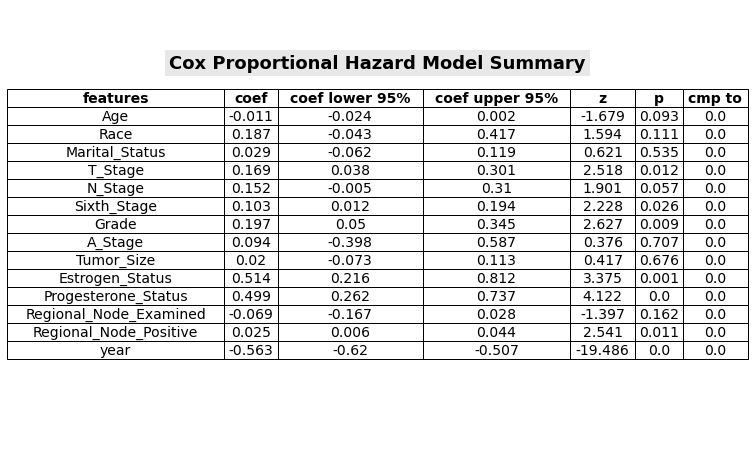

In [60]:
import matplotlib.pyplot as plt

# 获取 Cox 比例风险模型的摘要信息
summary_df_cox = cox_model.summary

# 选择需要显示的字段
selected_columns = ['coef', 'coef lower 95%', 'coef upper 95%', 'z', 'p', 'cmp to']

# 筛选出需要显示的列
summary_df_cox = summary_df_cox[selected_columns]

# 将数据四舍五入到后两位
summary_df_cox = summary_df_cox.round(3)

# 创建一个新的列来存储特征名称
summary_df_cox['features'] = summary_df_cox.index

# 将 features 列放在第一列
summary_df_cox = summary_df_cox[['features'] + selected_columns]

# 创建一个新的图表
fig, ax = plt.subplots(figsize=(12, 8))

# 添加标题
plt.text(0.5, 0.87, 'Cox Proportional Hazard Model Summary', fontsize=18, fontweight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
         bbox=dict(facecolor='lightgrey', alpha=0.5, edgecolor='none'))


# 隐藏坐标轴
ax.axis('off')

# 将 DataFrame 转换为表格
table = ax.table(cellText=summary_df_cox.values,
                 colLabels=summary_df_cox.columns,
                 loc='center',
                 cellLoc='center')  

# 设置表格字体大小
table.auto_set_font_size(False)
table.set_fontsize(14)

# 设置表头字体加粗
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold')

# 在第一列中添加特征名称
for i, feature_name in enumerate(summary_df_cox.index):
    table[(i+1, 0)].get_text().set_text(feature_name)

# 调整表格布局
table.auto_set_column_width(col=list(range(len(summary_df_cox.columns))))

# 调整单元格间距
table.scale(1.5, 1.5)

# 保存图片
plt.savefig('cox_model_summary.png', bbox_inches='tight', pad_inches=0.5)


In [61]:
# 使用测试集数据进行预测
predicted_survival_cox = cox_model.predict_expectation(df_test)

# 输出预测的生存时间
print(predicted_survival_cox)

680      89.666340
2054     99.057245
3347    101.220642
2250     95.097486
1542     95.804975
           ...    
489      79.264797
3711    101.411133
4012    104.751978
2987    103.750047
2810    104.120262
Length: 866, dtype: float64


In [62]:
# 计算 Concordance Index
c_index_cox = concordance_index(df_test['Survival_Month'], predicted_survival_cox,df_test['Status'])
print("Cox Concordance Index:", c_index_cox)

Cox Concordance Index: 0.9477656970455969


In [63]:
# 计算 Brier Score
brier_score_cox = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_cox, df_test['Status'])
print("Cox Brier Score:", brier_score_cox)

Cox Brier Score: 0.05223430295440314


In [64]:
# 计算RMSE
RMSE_cox=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_cox))
print("Cox RMSE:",RMSE_cox)

Cox RMSE: 24.327380443292697


In [65]:
# 计算残差平方和
residuals_cox=df_test['Survival_Month']-predicted_survival_cox
sse_cox=np.sum(residuals_cox**2)
print("Cox SSE:",sse_cox)

Cox SSE: 512517.36637551815


#### (2.2.1.2) Weibull比例风险模型

In [66]:
from lifelines import WeibullAFTFitter

In [67]:
weibull_model=WeibullAFTFitter()

weibull_model.fit(df_train,duration_col='Survival_Month',event_col='Status')

predicted_survival_weibull=weibull_model.predict_expectation(df_test)

                                 coef  coef lower 95%  coef upper 95%       z  \
param   covariate                                                               
lambda_ A_Stage                -0.026          -0.120           0.067  -0.553   
        Age                     0.004           0.001           0.006   2.491   
        Estrogen_Status        -0.042          -0.104           0.019  -1.348   
        Grade                  -0.035          -0.070          -0.000  -1.970   
        Marital_Status         -0.009          -0.029           0.010  -0.921   
        N_Stage                -0.001          -0.077           0.076  -0.018   
        Progesterone_Status    -0.075          -0.129          -0.020  -2.686   
        Race                   -0.040          -0.094           0.014  -1.441   
        Regional_Node_Examined  0.030           0.005           0.055   2.322   
        Regional_Node_Positive -0.002          -0.008           0.004  -0.601   
        Sixth_Stage         

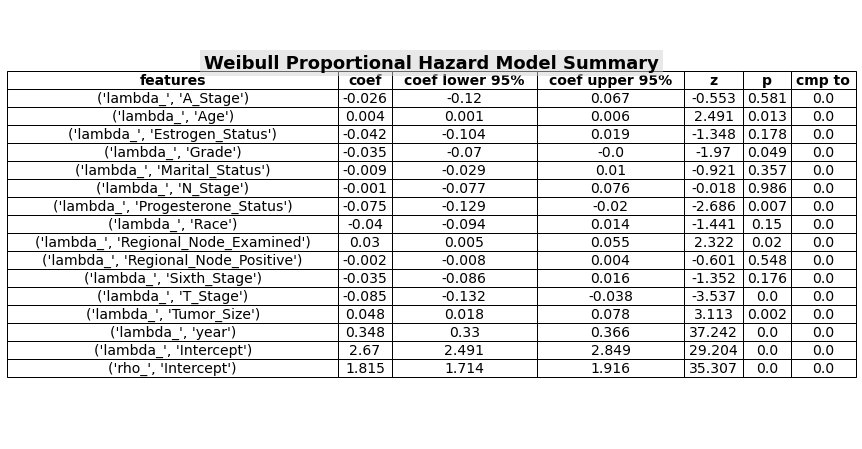

In [68]:
import matplotlib.pyplot as plt

# 获取 Cox 比例风险模型的摘要信息
summary_df_weibull = weibull_model.summary

# 选择需要显示的字段
selected_columns = ['coef', 'coef lower 95%', 'coef upper 95%', 'z', 'p', 'cmp to']

# 筛选出需要显示的列
summary_df_weibull = summary_df_weibull[selected_columns]

# 将数据四舍五入到后两位
summary_df_weibull = summary_df_weibull.round(3)
print(summary_df_weibull)

# 创建一个新的列来存储特征名称
summary_df_weibull['features'] = summary_df_weibull.index

# 将 features 列放在第一列
summary_df_weibull = summary_df_weibull[['features'] + selected_columns]

# 创建一个新的图表
fig, ax = plt.subplots(figsize=(12, 8))

# 添加标题
plt.text(0.5, 0.87, 'Weibull Proportional Hazard Model Summary', fontsize=18, fontweight='bold',
         horizontalalignment='center', verticalalignment='center', transform=ax.transAxes,
         bbox=dict(facecolor='lightgrey', alpha=0.5, edgecolor='none'))

# 隐藏坐标轴
ax.axis('off')

# 将 DataFrame 转换为表格
table = ax.table(cellText=summary_df_weibull.values,
                 colLabels=summary_df_weibull.columns,
                 loc='center',
                 cellLoc='center')  

# 设置表格字体大小
table.auto_set_font_size(False)
table.set_fontsize(14)

# 设置表头字体加粗
for (i, j), cell in table.get_celld().items():
    if i == 0:
        cell.set_text_props(fontweight='bold')

# 在第一列中添加特征名称
for i, feature_name in enumerate(summary_df_weibull.index):
    table[(i+1, 0)].get_text().set_text(feature_name)

# 调整表格布局
table.auto_set_column_width(col=list(range(len(summary_df_weibull.columns))))

# 调整单元格间距
table.scale(1.5, 1.5)

# 保存图片
plt.savefig('weibull_model_summary.png', bbox_inches='tight', pad_inches=0.5)


In [69]:
# 计算 Concordance Index
c_index_weibull = concordance_index(df_test['Survival_Month'], predicted_survival_weibull, df_test['Status'])
print("Weibull Concordance Index:", c_index_weibull)

Weibull Concordance Index: 0.972027096260033


In [70]:
# 计算 Brier Score
brier_score_weibull = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_weibull, df_test['Status'])
print("Weibull Brier Score:", brier_score_weibull)

Weibull Brier Score: 0.027972903739966984


In [71]:
# 计算RMSE
RMSE_weibull=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_weibull))
print("Weibull RMSE:",RMSE_weibull)

Weibull RMSE: 86.70689100814964


In [72]:
# 计算残差平方和
residuals_weibull=df_test['Survival_Month']-predicted_survival_weibull
sse_weibull=np.sum(residuals_weibull**2)
print("Weibull SSE:",sse_weibull)

Weibull SSE: 6510661.565227055


#### (2.3) 加速失效时间模型

#### (2.3.1) 对数正态分布的加速失效时间模型

In [73]:
from lifelines import LogNormalAFTFitter
from lifelines.datasets import load_rossi
from sklearn.model_selection import train_test_split

# 创建对数正态分布的加速失效时间模型对象
aft_model = LogNormalAFTFitter()

# 使用训练集数据拟合对数正态分布的AFT模型
aft_model.fit(df_train, duration_col='Survival_Month', event_col='Status')

# 使用测试集数据进行预测
predicted_survival_aft= aft_model.predict_expectation(df_test)

# 输出预测的生存时间
print(predicted_survival_aft)


680      78.290213
2054    174.006760
3347    241.992666
2250    149.302937
1542    110.957521
           ...    
489      53.280010
3711    309.453847
4012    414.575533
2987    284.410123
2810    311.912655
Length: 866, dtype: float64


In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# 获取 AFT 模型的摘要信息
summary_df_aft = aft_model.summary

# 选择需要显示的字段
selected_columns = ['coef', 'coef lower 95%', 'coef upper 95%', 'z', 'p', 'cmp to']

# 筛选出需要显示的列
summary_df_aft = summary_df_aft[selected_columns]


summary_df_aft = summary_df_aft.round(3)

print(summary_df_aft)

                                coef  coef lower 95%  coef upper 95%       z  \
param  covariate                                                               
mu_    A_Stage                 0.064          -0.102           0.229   0.754   
       Age                     0.004           0.000           0.008   1.978   
       Estrogen_Status        -0.082          -0.187           0.023  -1.535   
       Grade                  -0.042          -0.091           0.007  -1.685   
       Marital_Status         -0.014          -0.044           0.015  -0.934   
       N_Stage                -0.002          -0.119           0.116  -0.026   
       Progesterone_Status    -0.117          -0.201          -0.034  -2.761   
       Race                   -0.058          -0.133           0.016  -1.528   
       Regional_Node_Examined  0.037           0.004           0.070   2.171   
       Regional_Node_Positive -0.007          -0.017           0.002  -1.536   
       Sixth_Stage            -0.036    

In [75]:
# 计算一致性指数
c_index_aft = concordance_index(df_test['Survival_Month'], predicted_survival_aft, event_observed=df_test['Status'])

# 输出一致性指数
print("aft Concordance Index:", c_index_aft)

aft Concordance Index: 0.9717538566630615


In [76]:
# 计算 Brier Score
brier_score_aft = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_aft, df_test['Status'])
print("aft Brier Score:", brier_score_aft)

aft Brier Score: 0.02824614333693858


In [77]:
# 计算RMSE
RMSE_aft=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_aft))
print("Aft RMSE:",RMSE_aft)

Aft RMSE: 135.48948505714992


In [78]:
# 计算残差平方和
residuals_aft=df_test['Survival_Month']-predicted_survival_aft
sse_aft=np.sum(residuals_aft**2)
print("Aft SSE:",sse_aft)

Aft SSE: 15897508.885870729


### 比较Cox、Weibull、aft三种模型

#### 1. 绘制生存曲线

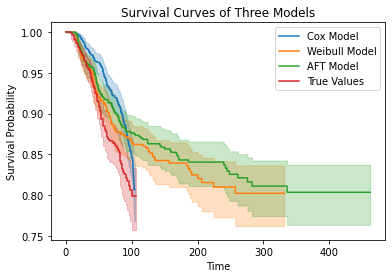

In [79]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 创建 Kaplan-Meier 生存曲线对象
kmf_cox = KaplanMeierFitter()
kmf_weibull = KaplanMeierFitter()
kmf_aft = KaplanMeierFitter()
kmf_raw=KaplanMeierFitter()

event_times_cox = predicted_survival_cox
event_observed_cox = df_test['Status']
event_times_weibull = predicted_survival_weibull
event_observed_weibull = df_test['Status']
event_times_aft = predicted_survival_aft
event_observed_aft = df_test['Status']
event_times_raw=df_test['Survival_Month']
event_observed_raw=df_test['Status']

# 根据事件数据和生存时间数据拟合 Kaplan-Meier 生存曲线
kmf_cox.fit(event_times_cox, event_observed=event_observed_cox)
kmf_weibull.fit(event_times_weibull, event_observed=event_observed_weibull)
kmf_aft.fit(event_times_aft, event_observed=event_observed_aft)
kmf_raw.fit(event_times_raw,event_observed=event_observed_raw)

# 绘制生存曲线
kmf_cox.plot(label='Cox Model')
kmf_weibull.plot(label='Weibull Model')
kmf_aft.plot(label='AFT Model')
kmf_raw.plot(label='True Values')

# 添加标题和标签
plt.title('Survival Curves of Three Models')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# 添加图例
plt.legend()

# 显示图表
plt.show()


1. C-index: 评估模型对样本的排列顺序是否正确，C-index越接近1表示模型的预测越准确<br>
2. Brier Score: 用于评估生存模型的预测准确度，是对模型预测与实际观察值之间的差异进行平方后的平均值，越接近0表示模型的预测越准确<br>
3. Log-rank Test: 用于比较不同生存曲线之间的差异是否显著<br>
4. Calibration Plot: 用于观察模型的预测值与实际观察值之间的关系，以评估模型的校准性能

#### 2. Kruskai-Wallis检验

In [80]:
from scipy.stats import kruskal

In [81]:
group1_survival_times=predicted_survival_cox
group2_survival_times=predicted_survival_weibull
group3_survival_times=predicted_survival_aft

# 执行Kruskal-Wallis检验
statistic, p_value = kruskal(group1_survival_times, group2_survival_times, group3_survival_times)

# 输出结果
print("Kruskal-Wallis test statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis test statistic: 216.68666273284907
P-value: 8.85297089723347e-48


1. Kruskal-Wallis检验统计量（Kruskal-Wallis test statistic）：这个值是根据样本数据计算出来的统计量，用于衡量三个或多个组之间的差异程度。较大的统计量表示组之间的差异较大。<br>
2. p-value：p-value表示在原假设为真的情况下，观察到与实际数据一样极端或更极端结果的概率。在这个情况下，p-value非常接近零，通常小于显著性水平（通常为0.05）。<br>
因此，我们可以拒绝原假设，并得出结论：三组生存时间存在显著差异。

### 3. 模型平均方法

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score

#### (3.1) 贝叶斯模型平均方法

In [83]:
# 计算 Cox 比例风险模型的似然度
cox_log_likelihood = cox_model.log_likelihood_
print(cox_log_likelihood)

# 计算 Weibull 比例风险模型的似然度
weibull_log_likelihood = weibull_model.log_likelihood_
print(weibull_log_likelihood)

# 计算对数正态分布的加速失效时间模型的似然度
aft_log_likelihood = aft_model.log_likelihood_
print(aft_log_likelihood)

-1589.8011046316587
-1209.1679382521206
-1275.3240773244738


In [84]:
# 将似然度放入数组中
log_likelihoods = np.array([cox_log_likelihood, weibull_log_likelihood, aft_log_likelihood])

In [85]:
log_likelihoods

array([-1589.80110463, -1209.16793825, -1275.32407732])

In [86]:
# 假设每个模型的先验权重相等
prior_weights = np.ones(3) / 3

# 计算证据（evidence），即所有模型的先验权重乘以其似然度的总和
evidence = np.sum(prior_weights * log_likelihoods)

In [87]:
# 计算后验权重（作为贝叶斯模型平均中每个模型的权重）
posterior_weights = (prior_weights * log_likelihoods) / evidence

In [88]:
posterior_weights

array([0.39020293, 0.29677981, 0.31301726])

In [89]:
# 利用后验权重对每个模型的预测结果进行加权平均
predicted_survival_bayes = (posterior_weights[0] * predicted_survival_cox +
                               posterior_weights[1] * predicted_survival_weibull +
                               posterior_weights[2] * predicted_survival_aft)

In [90]:
predicted_survival_bayes

680      78.725972
2054    133.862410
3347    171.169543
2250    120.449518
1542     98.686201
           ...    
489      61.178784
3711    211.401425
4012    260.490615
2987    193.308136
2810    207.064517
Length: 866, dtype: float64

In [91]:
# 计算CI值
c_index_bayes = concordance_index(df_test['Survival_Month'], predicted_survival_bayes,df_test['Status'])

print("Bayes Concordance Index:", c_index_bayes)

Bayes Concordance Index: 0.9693174702567313


In [92]:
# 计算RMSE（均方根误差）
RMSE_bayes=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_bayes))
print("Bayes RMSE:",RMSE_bayes)

Bayes RMSE: 72.10696139036597


In [93]:
# 计算 Brier Score
brier_score_bayes = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_bayes, df_test['Status'])
print("Bayes Brier Score:", brier_score_bayes)

Bayes Brier Score: 0.030682529743268627


In [94]:
# 计算平均绝对误差
mae_bayes = mean_absolute_error(df_test['Survival_Month'],predicted_survival_bayes)
print("Bayes MAE:", mae_bayes)

Bayes MAE: 58.15201929330543


#### (3.2) Bagging

In [95]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from lifelines import CoxPHFitter, WeibullAFTFitter
from sklearn.metrics import mean_squared_error

X_train=df_train.drop(columns=['Survival_Month','Status'],inplace=False)
y_train=df_train['Survival_Month']
X_test=df_test.drop(columns=['Survival_Month','Status'],inplace=False)
y_test=df_test['Survival_Month']

# 定义 BaggingRegressor 模型对象
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=10, random_state=42)

# 将 Cox 和 Weibull 模型的预测结果作为训练数据
bagging_X_train = pd.DataFrame({
    'Cox_Predictions': cox_model.predict_expectation(X_train),
    'Weibull_Predictions': aft_model.predict_expectation(X_train),
    'Aft_Predicions':aft_model.predict_expectation(X_train)
})

# 将 Cox 和 Weibull 模型的预测结果作为测试数据
bagging_X_test = pd.DataFrame({
    'Cox_Predictions': cox_model.predict_expectation(X_test),
    'Weibull_Predictions': aft_model.predict_expectation(X_test),
    'Aft_Predicions':aft_model.predict_expectation(X_test)
})

# 拟合 BaggingRegressor 模型
bagging_model.fit(bagging_X_train, y_train)

# 使用 BaggingRegressor 进行预测
predicted_survival_bagging = bagging_model.predict(bagging_X_test)

# 输出预测的生存时间
# print(predicted_survival_bagging)

# 计算预测结果的均方误差
mse_bagging = mean_squared_error(y_test, predicted_survival_bagging)
print("Bagging Model MSE:", mse_bagging)


/Users/linjiaxi/Anaconda/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Model MSE: 18.422090069284067


In [96]:
# 计算CI值
c_index_bagging = concordance_index(df_test['Survival_Month'], predicted_survival_bagging,df_test['Status'])

print("Bagging Concordance Index:", c_index_bagging)

Bagging Concordance Index: 0.9667558490351227


In [97]:
# 计算 Brier Score
brier_score_bagging = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_bagging, df_test['Status'])
print("Bagging Brier Score:", brier_score_bagging)

Bagging Brier Score: 0.033244150964877324


In [98]:
# 计算平均绝对误差
mae_bagging = mean_absolute_error(df_test['Survival_Month'],predicted_survival_bagging)
print("Bagging MAE:", mae_bagging)

Bagging MAE: 3.5137413394919164


In [99]:
# 计算RMSE（均方根误差）
RMSE_bagging=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_bagging))
print("Bayes RMSE:",RMSE_bagging)

Bayes RMSE: 4.292096232528351


In [100]:
# 计算R平方（绝对系数）
r2_bagging=r2_score(df_test['Survival_Month'],predicted_survival_bagging)
print("Bagging R-squared:",r2_bagging)

Bagging R-squared: 0.9628160985161198


#### (3.3) 加权模型平均方法

#### (3.3.1) AIC信息准则

In [101]:
## 1.Cox比例风险模型
# 计算 log-likelihood
cox_log_likelihood = cox_model.log_likelihood_

# 获取参数数量
cox_num_params = cox_model.params_.shape[0]

# 计算 AIC
cox_aic = -2 * cox_log_likelihood + 2 * cox_num_params


## 2.Weibull比例风险模型
# 计算 log-likelihood
weibull_log_likelihood = weibull_model.log_likelihood_

# 获取参数数量
weibull_num_params = weibull_model.params_.shape[0]

# 计算 AIC
weibull_aic = -2 * weibull_log_likelihood + 2 * weibull_num_params


## 3.对数正态分布的加速失效时间模型
# 计算 log-likelihood
aft_log_likelihood = aft_model.log_likelihood_

# 获取参数数量
aft_num_params = aft_model.params_.shape[0]

# 计算 AIC
aft_aic = -2 * aft_log_likelihood + 2 * aft_num_params


In [102]:
cox_log_likelihood

-1589.8011046316587

In [103]:
weibull_log_likelihood

-1209.1679382521206

In [104]:
aft_log_likelihood

-1275.3240773244738

In [105]:
aic_values=[cox_aic,weibull_aic,aft_aic]

In [106]:
aic_values

[3207.6022092633175, 2450.3358765042412, 2582.6481546489476]

In [107]:
#计算AIC差异
delta_aic=np.array(aic_values)-np.min(aic_values)

#计算权重
weights_aic=np.exp(-0.5*delta_aic)
weights_aic/=np.sum(weights_aic)

print("AIC 权重值:",weights_aic)

AIC 权重值: [3.64506415e-165 1.00000000e+000 1.85675181e-029]


In [108]:
# 利用后验权重对每个模型的预测结果进行加权平均
predicted_survival_aic = (weights_aic[0] * predicted_survival_cox +
                               weights_aic[1] * predicted_survival_weibull +
                               weights_aic[2] * predicted_survival_aft)

In [109]:
predicted_survival_aic

680      64.801293
2054    137.283137
3347    188.439606
2250    123.350047
1542     89.531696
           ...    
489      45.730421
3711    252.598409
4012    302.738883
2987    214.971787
2810    231.829921
Length: 866, dtype: float64

In [110]:
# 计算CI值
c_index_aic = concordance_index(df_test['Survival_Month'], predicted_survival_aic,df_test['Status'])

print("AIC Concordance Index:", c_index_aic)

AIC Concordance Index: 0.972027096260033


In [111]:
# 计算RMSE（均方根误差）
RMSE_aic=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_aic))
print("AIC RMSE:",RMSE_aic)

AIC RMSE: 86.70689100814964


In [112]:
# 计算 Brier Score
brier_score_aic = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_aic, df_test['Status'])
print("AIC Brier Score:", brier_score_aic)

AIC Brier Score: 0.027972903739966984


In [113]:
# 计算平均绝对误差MAE
mae_aic = mean_absolute_error(df_test['Survival_Month'],predicted_survival_aic)
print("AIC MAE:", mae_aic)

AIC MAE: 63.07702262661253


In [114]:
# 计算R平方（绝对系数）
r2_aic=r2_score(df_test['Survival_Month'],predicted_survival_aic)
print("AIC R-squared:",r2_aic)

AIC R-squared: -14.174810730683918


#### (3.3.2) BIC信息准则

In [115]:
log_likelihoods=[cox_log_likelihood,weibull_log_likelihood,aft_log_likelihood ]
num_params=[cox_num_params,weibull_num_params,aft_num_params]

In [116]:
n=len(df_train)

In [117]:
# 计算BIC值
bic_values = [-2 * log_likelihood + num_params * np.log(n) for log_likelihood, num_params in zip(log_likelihoods, num_params)]


In [118]:
bic_values

[3286.140280076107, 2540.0936717188583, 2672.4059498635647]

In [119]:
# 计算BIC差异
delta_bic = np.array(bic_values) - np.min(bic_values)

# 计算权重
weights_bic = np.exp(-0.5 * delta_bic)
weights_bic /= np.sum(weights_bic)

In [120]:
print("BIC 权重值:", weights_bic)

BIC 权重值: [9.95491082e-163 1.00000000e+000 1.85675181e-029]


In [121]:
# 利用后验权重对每个模型的预测结果进行加权平均
predicted_survival_bic = (weights_bic[0] * predicted_survival_cox +
                               weights_bic[1] * predicted_survival_weibull +
                               weights_bic[2] * predicted_survival_aft)

In [122]:
predicted_survival_bic

680      64.801293
2054    137.283137
3347    188.439606
2250    123.350047
1542     89.531696
           ...    
489      45.730421
3711    252.598409
4012    302.738883
2987    214.971787
2810    231.829921
Length: 866, dtype: float64

In [123]:
# 计算CI值
c_index_bic = concordance_index(df_test['Survival_Month'], predicted_survival_bic,df_test['Status'])

print("BIC Concordance Index:", c_index_bic)

BIC Concordance Index: 0.972027096260033


In [124]:
# 计算RMSE（均方根误差）
RMSE_bic=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_bic))
print("BIC RMSE:",RMSE_bic)

BIC RMSE: 86.70689100814964


In [125]:
# 计算 Brier Score
brier_score_bic = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_bic, df_test['Status'])
print("BIC Brier Score:", brier_score_bic)

BIC Brier Score: 0.027972903739966984


In [126]:
# 计算平均绝对误差
mae_bic = mean_absolute_error(df_test['Survival_Month'],predicted_survival_bic)
print("BIC MAE:", mae_bic)

BIC MAE: 63.07702262661253


In [127]:
# 计算R平方（绝对系数）
r2_bic=r2_score(df_test['Survival_Month'],predicted_survival_bic)
print("BIC R-squared:",r2_bic)

BIC R-squared: -14.174810730683918


#### (3.3.2) Mallows准则

In [130]:
from scipy.optimize import minimize

# 定义模型的预测结果
# 这里假设有三个模型，每个模型的预测结果保存在一个numpy数组中
cox_predictions = predicted_survival_cox
weibull_predictions = predicted_survival_weibull
aft_predictions = predicted_survival_aft

# 定义目标函数，即Mallows方法中的距离函数
def distance(weights):
    weighted_avg = weights[0]*predicted_survival_cox + weights[1]*predicted_survival_weibull + weights[2]*predicted_survival_aft    
# 这里使用简单的欧氏距离作为距离函数，你也可以选择其他的距离度量方式
    return np.linalg.norm(weighted_avg - df_test['Survival_Month'])

# 初始权重猜测值
initial_weights = np.array([0.33, 0.33, 0.34])

# 约束条件，权重之和为1
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights) - 1})

# 最小化目标函数
result = minimize(distance, initial_weights, constraints=constraints)

# 输出结果
weights_mallows = result.x
print("Optimal weights:", weights_mallows)


Optimal weights: [ 0.32948169  1.91120321 -1.2406849 ]


In [131]:
# 利用权重对每个模型的预测结果进行加权平均
predicted_survival_mallows = (weights_mallows[0] * predicted_survival_cox +
                               weights_mallows[1] * predicted_survival_weibull +
                               weights_mallows[2] * predicted_survival_aft)

In [132]:
# 计算CI值
c_index_mallows = concordance_index(df_test['Survival_Month'], predicted_survival_mallows,df_test['Status'])

print("Mallows Concordance Index:", c_index_mallows)

Mallows Concordance Index: 0.9596402345306541


In [133]:
# 计算RMSE（均方根误差）
RMSE_mallows=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_mallows))
print("Mallows RMSE:",RMSE_mallows)

Mallows RMSE: 7.2059632114867735


In [134]:
# 计算 Brier Score
brier_score_mallows = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_mallows, df_test['Status'])
print("Mallows Brier Score:", brier_score_mallows)

Mallows Brier Score: 0.040359765469345936


In [135]:
# 计算平均绝对误差
mae_mallows = mean_absolute_error(df_test['Survival_Month'],predicted_survival_mallows)
print("Mallows MAE:", mae_mallows)

Mallows MAE: 5.119272676880917


In [136]:
# 计算R平方（绝对系数）
r2_mallows=r2_score(df_test['Survival_Month'],predicted_survival_mallows)
print("Mallows R-squared:",r2_mallows)

Mallows R-squared: 0.8951906239376789


#### (3.3.3) Jackknife准则

In [135]:
predictions=np.array([predicted_survival_cox,predicted_survival_weibull,predicted_survival_aft])
def jackknife_weights(data):
    """
    使用Jackknife准则计算数据的权重
    
    参数：
    - data: 一个包含n个样本的numpy数组
    
    返回值：
    - weights: 一个包含n个样本权重的numpy数组
    """
    n = len(data)
    mean_full = np.mean(data)
    weights = np.zeros(n)
    
    for i in range(n):
        data_jk = np.delete(data, i)  # 删除第i个样本
        mean_jk = np.mean(data_jk)
        weights[i] = (n - 1) / n * (mean_jk - mean_full)**2
    
    # 标准化权重
    weights /= np.sum(weights)
    
    return weights

In [136]:
weights_jackknife=jackknife_weights(predictions)
print(weights_jackknife)

[0.46530982 0.28499823 0.24969195]


In [137]:
predicted_survival_jackknife=(weights_jackknife[0] * predicted_survival_cox +
                               weights_jackknife[1] * predicted_survival_weibull +
                               weights_jackknife[2] * predicted_survival_aft)

In [138]:
# 计算CI值
c_index_jackknife = concordance_index(df_test['Survival_Month'], predicted_survival_jackknife,df_test['Status'])

print("Jackknife Concordance Index:", c_index_jackknife)

Jackknife Concordance Index: 0.9684294415665737


In [139]:
# 计算RMSE（均方根误差）
RMSE_jackknife=np.sqrt(mean_squared_error(df_test['Survival_Month'],predicted_survival_jackknife))
print("Jackknife RMSE:",RMSE_jackknife)

Jackknife RMSE: 63.49383648751396


In [140]:
# 计算 Brier Score
brier_score_jackknife = utils.concordance_index(df_test['Survival_Month'], -predicted_survival_jackknife, df_test['Status'])
print("Jackknnife Brier Score:", brier_score_jackknife)

Jackknnife Brier Score: 0.03157055843342631


In [141]:
# 计算平均绝对误差
mae_jackknife = mean_absolute_error(df_test['Survival_Month'],predicted_survival_jackknife)
print("Jackknife MAE:", mae_jackknife)

Jackknife MAE: 52.546829169509365


In [142]:
# 计算R平方（绝对系数）
r2_jackknife=r2_score(df_test['Survival_Month'],predicted_survival_jackknife)
print("Jackknife R-squared:",r2_jackknife)

Jackknife R-squared: -7.137278740368243


### 比较贝叶斯、Bagging、AIC、BIC、Mallows、Jackknife六个模型

In [1]:
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# 创建 Kaplan-Meier 生存曲线对象
kmf_bayes = KaplanMeierFitter()
kmf_bagging = KaplanMeierFitter()
kmf_aic = KaplanMeierFitter()
kmf_bic = KaplanMeierFitter()
kmf_mallows=KaplanMeierFitter()
kmf_jackknife=KaplanMeierFitter()
kmf_raw=KaplanMeierFitter()

# 根据预测的生存时间数据拟合 Kaplan-Meier 生存曲线
kmf_bayes.fit(predicted_survival_bayes, label='Bayes Model',ci_show=True)
kmf_bagging.fit(predicted_survival_bagging, label='Bagging Model',ci_show=True)
kmf_aic.fit(predicted_survival_aic, label='AIC Model',ci_show=True)
kmf_bic.fit(predicted_survival_bic, label='BIC Model',ci_show=True)
kmf_mallows.fit(df_test['Survival_Month'],label='Mallows Model',ci_show=True)
kmf_jackknife.fit(df_test['Survival_Month'],label='Jackknife Model',ci_show=True)
kmf_raw.fit(df_test['Survival_Month'],label='True Values',ci_show=True)


# 绘制生存曲线
kmf_bayes.plot()
kmf_bagging.plot()
kmf_aic.plot()
kmf_bic.plot()
kmf_mallows.plot()
kmf_jackknife.plot()
kmf_raw.plot()

# 添加标题和标签
plt.title('Survival Curves of Six Models')
plt.xlabel('Time')
plt.ylabel('Survival Probability')

# 添加图例
plt.legend()

# 显示图表
plt.show()


NameError: name 'predicted_survival_bayes' is not defined

In [144]:
#对六种模型平均方法进行Kruskal-Wallis检验
group1_survival_times=predicted_survival_bayes
group2_survival_times=predicted_survival_bagging
group3_survival_times=predicted_survival_aic
group4_survival_times=predicted_survival_bic
group5_survival_times=predicted_survival_mallows
group6_survival_times=predicted_survival_jackknife

# 执行Kruskal-Wallis检验
statistic, p_value = kruskal(group1_survival_times, group2_survival_times, group3_survival_times,group4_survival_times,group5_survival_times,group6_survival_times)

# 输出结果
print("Kruskal-Wallis test statistic:", statistic)
print("P-value:", p_value)

Kruskal-Wallis test statistic: 1008.6450519679889
P-value: 8.076576125985366e-216


In [145]:
from scipy.stats import levene

# 执行Levene检验
statistic, p_value = levene(predicted_survival_bayes, predicted_survival_bagging, predicted_survival_aic, predicted_survival_bic, predicted_survival_mallows, predicted_survival_jackknife)

# 输出结果
print("Levene检验统计量:", statistic)
print("P 值:", p_value)

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p_value < alpha:
    print("拒绝原假设，各组方差不相等")
else:
    print("接受原假设，各组方差相等")

Levene检验统计量: 275.7637726940321
P 值: 2.8949656312197614e-262
拒绝原假设，各组方差不相等


In [146]:
#进行多因素方差分析（ANOVA）
from scipy.stats import f_oneway
f_statistic, p_value = f_oneway(predicted_survival_bayes, predicted_survival_bagging, predicted_survival_aic, predicted_survival_bic, predicted_survival_mallows, predicted_survival_jackknife)

# 输出结果
print("F 统计量:", f_statistic)
print("P 值:", p_value)

# 判断是否拒绝原假设
alpha = 0.05  # 显著性水平
if p_value < alpha:
    print("拒绝原假设，六种方法之间存在显著差异")
else:
    print("接受原假设，六种方法之间不存在显著差异")

F 统计量: 230.19281138105063
P 值: 1.4245793891361723e-222
拒绝原假设，六种方法之间存在显著差异


In [147]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# 将数据整理成适合Tukey的格式
data = pd.DataFrame({'Method': ['predicted_survival_bayes']*len(predicted_survival_bayes) + ['predicted_survival_bagging']*len(predicted_survival_bagging) + ['predicted_survival_aic']*len(predicted_survival_aic) + ['predicted_survival_bic']*len(predicted_survival_bic) + ['predicted_survival_mallows']*len(predicted_survival_mallows) + ['predicted_survival_jackknife']*len(predicted_survival_jackknife),
                     'Result': predicted_survival_bayes + predicted_survival_bagging + predicted_survival_aic + predicted_survival_bic + predicted_survival_mallows + predicted_survival_jackknife})

# 执行Tukey的HSD检验
result = pairwise_tukeyhsd(data['Result'], data['Method'])

# 输出检验结果
print(result)


ValueError: array length 5196 does not match index length 866